## COVID-19 Unvaccinated vs. Vaccinated Comparisons
> By: Mara Clay, David Truong, and Isaac Rodriguez

For our final project, we analyzed COVID-19 data from the state of California. Specifically, we looked at the differences for unvaccinated individuals and vaccinated individuals in certain aspects, such as number of cases, number of hospitalizations, and number of deaths per 100,000 people. We created functions to help graph our data efficiently and calculate necessary statistics all at once. This project was important to us because COVID is still a part of all of our lives and affects us daily. We believe that it is extremely important to look at these trends so that we can make our own analysis of the effectiveness of the vaccine. Through the use of python, we can easily graph all of our data and analyze the trends. We can see the specific differences in the data by looking at our combined plots for each comparison. We can also get the statistics of the data to compare between the unvaccinated and vaccinated people. These can be used to make our comparisons between the unvaccinated and vaccinated people. This project will help us to see whether the vaccine has been keeping case numbers down, kept people out of the hospital, and decreased the number of deaths per 100,000 people. 

  ## Importing and Functions

In [16]:
## importing necessary libraries and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
covid_data=pd.read_csv('https://data.chhs.ca.gov/dataset/e39edc8e-9db1-40a7-9e87-89169401c3f5/resource/de27ce58-edc8-45fb-bebc-08c4b29c5efe/download/covid19postvaxstatewidestats_07172022.csv%27')
covid_df = covid_data.set_index('date')
covid_df.head(533)

,area,area_type,unvaccinated_cases,vaccinated_cases,boosted_cases,unvaccinated_hosp,vaccinated_hosp,boosted_hosp,unvaccinated_deaths,vaccinated_deaths,...,population_boosted,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,boosted_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,boosted_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k,boosted_deaths_per_100k
date,,,,,,,,,,,,,,,,,,,,,
2021-02-01,California,State,13867,24,0,773,1,0,12,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-02,California,State,11388,18,0,600,0,0,15,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-03,California,State,10360,27,0,548,0,0,18,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,California,State,9030,18,0,484,0,0,19,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,California,State,8429,15,0,500,0,0,28,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-13,California,State,10167,2468,5958,217,44,80,17,3,...,15990885,228.649954,19.829962,33.523562,5.429738,0.432764,0.578901,0.453357,0.041758,0.030374
2022-07-14,California,State,9708,2260,5377,210,39,73,10,3,...,15998929,228.036507,19.424501,32.799517,5.458667,0.421584,0.536643,0.446682,0.037981,0.031252
2022-07-15,California,State,8804,2243,5099,195,31,57,15,1,...,16007721,225.238068,19.256849,32.282636,5.350407,0.393953,0.501544,0.408321,0.027868,0.031235


In [17]:
## made a stats function to return all stats for one column

def stats_max(column):
    '''This function obtains the statistics for a specific column that you ask for'''
    stats_df = covid_data.describe()
    return_column = stats_df.loc[:,column]
    print('Stats for ' + column + ':')
    print(return_column)

In [18]:
def twoSubplot(x,y,labelx,labely,labelT1,labelT2):
    '''This is for plotting 2 data seperately with labels'''
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.plot(x)
    ax2.plot(y)
    ax1.set_xlabel(labelx)
    ax2.set_xlabel(labelx)
    ax1.set_ylabel(labely)
    ax2.set_ylabel(labely)
    ax1.set_title(labelT1)
    ax2.set_title(labelT2)
    plt.show()

In [19]:
def combinedPlots(x,y,labelx,labely,labelT,labelfirst,labelsecond): 
    '''This is for taking 2 datas and combining it together with labels'''
    fig, ax = plt.subplots(figsize=(15, 6))
    plt.plot(x)
    plt.plot(y)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(labelT)
    plt.legend([labelfirst,labelsecond])
    plt.show()

## Unvaccinated vs. Vaccinated Cases

In [26]:
unv_cases = 'unvaccinated_cases'
v_cases = 'vaccinated_cases'
print(covid_data[unv_cases])
print(covid_data[v_cases])

0      13867
1      11388
2      10360
3       9030
4       8429
       ...  
527    10167
528     9708
529     8804
530     5924
531     4885
Name: unvaccinated_cases, Length: 532, dtype: int64
0        24
1        18
2        27
3        18
4        15
       ... 
527    2468
528    2260
529    2243
530    1498
531    1311
Name: vaccinated_cases, Length: 532, dtype: int64


In [27]:
stats_max(unv_cases)
stats_max(v_cases)

Stats for unvaccinated_cases:
count      532.000000
mean      5299.975564
std       7506.750534
min        383.000000
25%       1621.000000
50%       3136.500000
75%       5946.250000
max      52980.000000
Name: unvaccinated_cases, dtype: float64
Stats for vaccinated_cases:
count      532.000000
mean      3240.657895
std       8277.861463
min          6.000000
25%        124.000000
50%       1182.500000
75%       2175.000000
max      61390.000000
Name: vaccinated_cases, dtype: float64


In [28]:
# This section is for laabeling
laX = 'Number of days'
laY = 'Number of cases'
laT1 = 'Unvaccinated cases'
laT2 = 'Vaccinated cases'
laT3 = 'Unvaccinated and Vaccinated'
laT11 = 'Unvaccinated cases trend'
laT21 = 'Vaccinated cases trend'
laT31 = 'Unvaccinated and Vaccinated trend'

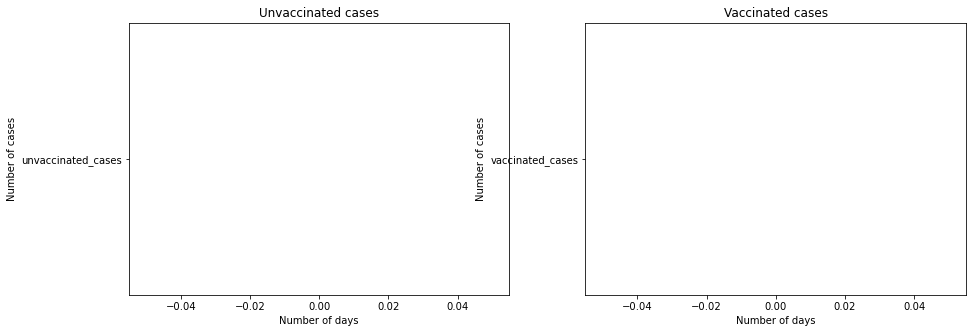

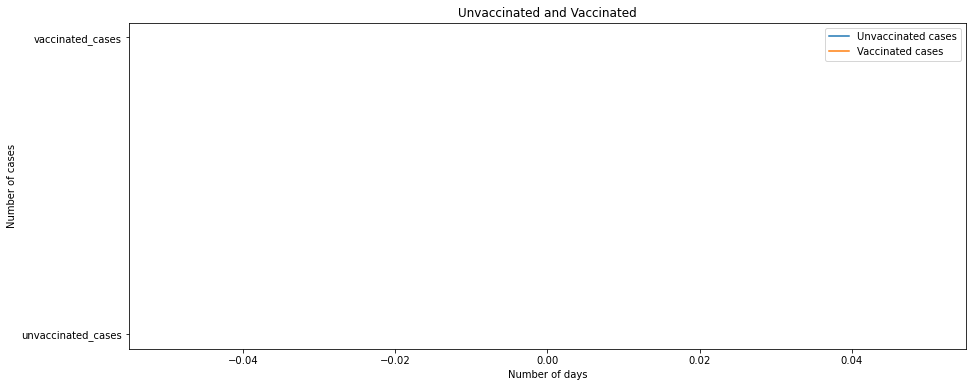

In [29]:
twoSubplot(unv_cases,v_cases,laX,laY,laT1,laT2)
combinedPlots(unv_cases,v_cases,laX,laY,laT3,laT1,laT2)